In [1]:
!pip install mlxtend

In [2]:
!pip install pyfpgrowth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5490 sha256=5fc72a5c96732acfa84eb2d42124fba806a00f6fff156bb502c153022905941e
  Stored in directory: /root/.cache/pip/wheels/dc/18/5b/4a113996892937d01f5bfb727710d0dc569cfce1326014f8d0
Successfully built pyfpgrowth


In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import datetime

# Sample dataset (replace this with your actual dataset)
buying_books_data = [
['Book1', 'Book2', 'Book3'],
['Book2', 'Book3', 'Book4'],
['Book1', 'Book3', 'Book5'],
['Book2', 'Book4', 'Book5'],
]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(buying_books_data).transform(buying_books_data)
df_buying_books = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
min_support = 0.2 # Adjust as needed
frequent_itemsets = apriori(df_buying_books, min_support=min_support,
use_colnames=True)

# Generate association rules
min_confidence = 0.5 # Adjust as needed
rules = association_rules(frequent_itemsets, metric='confidence',
min_threshold=min_confidence)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Display association rules
print("\nAssociation Rules:")
print(rules)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent Itemsets:
    support               itemsets
0      0.50                (Book1)
1      0.75                (Book2)
2      0.75                (Book3)
3      0.50                (Book4)
4      0.50                (Book5)
5      0.25         (Book1, Book2)
6      0.50         (Book1, Book3)
7      0.25         (Book1, Book5)
8      0.50         (Book3, Book2)
9      0.50         (Book4, Book2)
10     0.25         (Book5, Book2)
11     0.25         (Book3, Book4)
12     0.25         (Book3, Book5)
13     0.25         (Book5, Book4)
14     0.25  (Book1, Book2, Book3)
15     0.25  (Book1, Book5, Book3)
16     0.25  (Book4, Book3, Book2)
17     0.25  (Book4, Book5, Book2)

Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
0          (Book1)         (Book2)                0.50                0.75   
1          (Book1)         (Book3)                0.50                0.75   
2          (Book3)         (Book1)                0.75        

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
import pyfpgrowth
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual dataset)
buying_books_data = [
['Book1', 'Book2', 'Book3'],
['Book2', 'Book3', 'Book4'],
['Book1', 'Book3', 'Book5'],
['Book2', 'Book4', 'Book5'],
]

# Convert the dataset to a list of transactions
transactions = [tuple(transaction) for transaction in
buying_books_data]

# Apply the FP-growth algorithm
min_support = 2 # Adjust as needed
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)

# Generate association rules
min_confidence = 0.5 # Adjust as needed
rules = pyfpgrowth.generate_association_rules(patterns, min_confidence)

# Display frequent itemsets
print("Frequent Itemsets:")
print(patterns)

# Display association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
{('Book1',): 2, ('Book1', 'Book3'): 2, ('Book4',): 2, ('Book2', 'Book4'): 2, ('Book5',): 2, ('Book2',): 3, ('Book3',): 3, ('Book2', 'Book3'): 2}

Association Rules:
{('Book1',): (('Book3',), 1.0), ('Book3',): (('Book2',), 0.6666666666666666), ('Book2',): (('Book3',), 0.6666666666666666), ('Book4',): (('Book2',), 1.0)}


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Text(0.5, 1.0, 'Frequent Itemsets')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

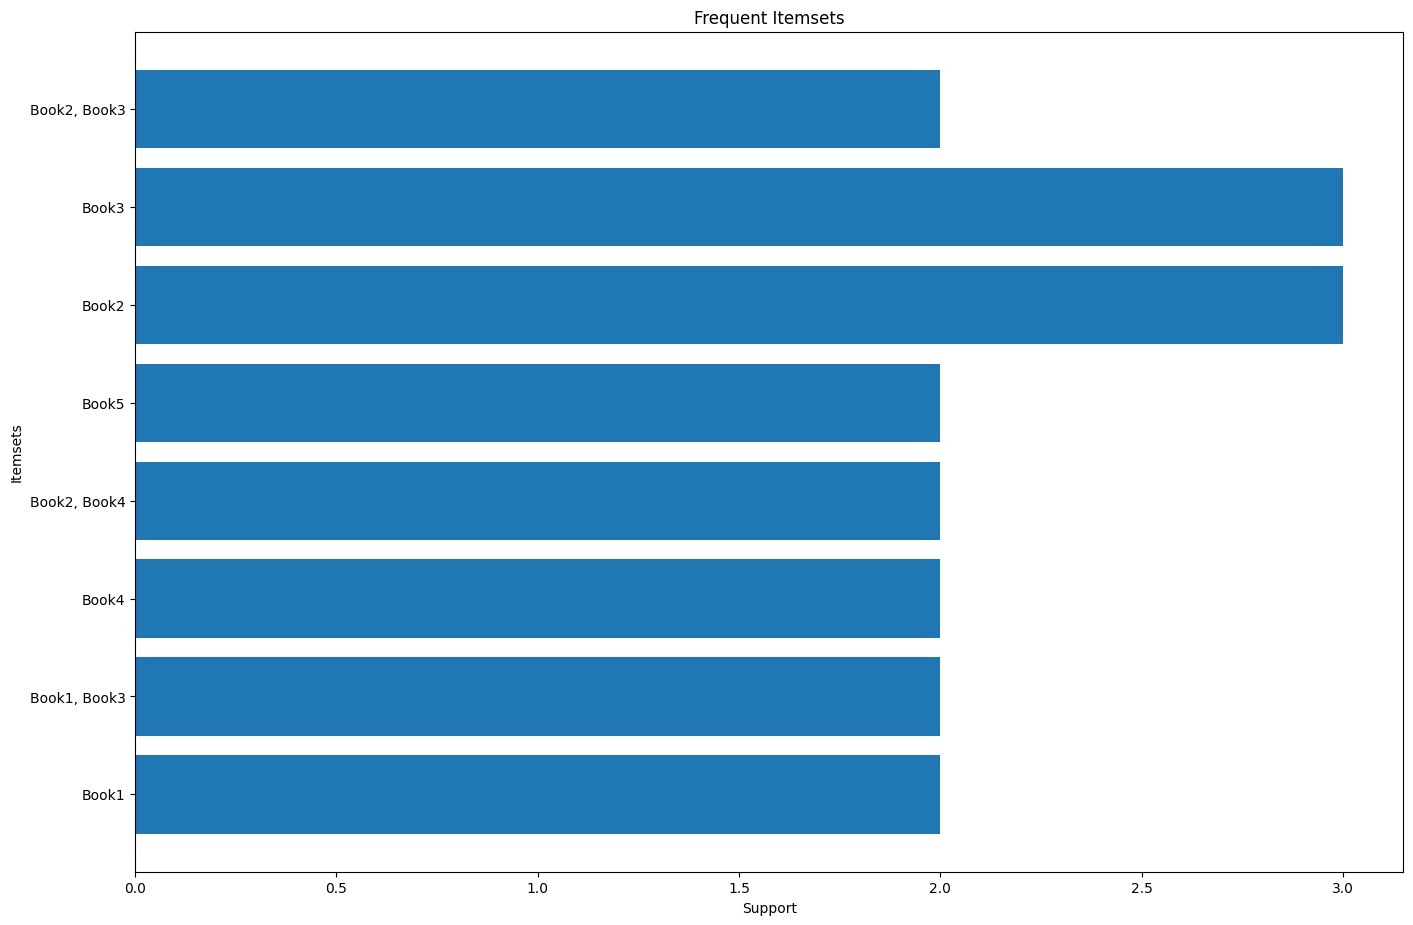

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
itemset_labels = [', '.join(map(str, itemset)) for itemset in
patterns.keys()]
plt.figure(figsize=(36, 24))
plt.subplot(2, 2, 1)
plt.barh(itemset_labels, list(patterns.values()))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Text(0.5, 1.0, 'Support Distribution')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

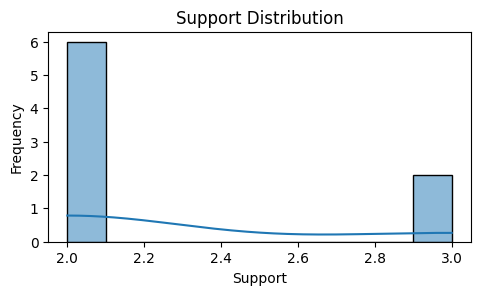

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.histplot(list(patterns.values()), bins=10, kde=True)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Support Distribution')